
### The House Price Prediction Problem Assignment


In this problem, given a dataset that records the house prices of 9,761 houses in King County, Washington, US. The house prices are recorded along with some other attributes like - area of the house, number of bedrooms, number of bathrooms, etc. You are required to do the following tasks:

In [1]:
import pandas as pd             
import matplotlib.pyplot as plt   
import numpy as np              
import seaborn as sns
import datetime
from datetime import datetime

In [2]:
# Set the working directory
import os
os.chdir(r"C:\Users\RAHUL\Desktop\DS_Monali\IML\IML_Project\docs")

#Read the house_price train data
import pandas as pd
df = pd.read_csv("kc_house_train_data.csv")

In [3]:
df.shape # to know number of rows and columns 

(9761, 21)

9761 signifies number of houses and 21 signifies features of the house

In [44]:
df.columns  #to know all the columns(variables) in dataframe 

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [32]:
df.head()  #to display the first 5 rows of the dataframe

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
0,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
1,7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,2014
2,9212900260,2014-05-27,468000.0,2,1.00,1160,6000,1.0,0,0,...,860,300,1942,0,98115,47.6900,-122.292,1330,6000,2014
3,114101516,2014-05-28,310000.0,3,1.00,1430,19901,1.5,0,0,...,1430,0,1927,0,98028,47.7558,-122.229,1780,12697,2014
4,6054650070,2014-10-07,400000.0,3,1.75,1370,9680,1.0,0,0,...,1370,0,1977,0,98074,47.6127,-122.045,1370,10208,2014


In [20]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Here as we can see date is object. so we need to extract date from it

Questions:

1. Are there any missing or zero values? is it possible for it to be zero or missing?
2. Is there any relationship between missing values and house price
3. How much are the missing values & what is the %? How are u going to deal with it?
2. Duplicates? do duplicates give any information?

In [4]:
#checking missing values
print(df.isnull().sum()) 

print("")
print("%of missing values")
print("")

#here checking percentage of missing values present in each variable
for column in df.columns: #for each column in data
    null = (sum(df[column].isnull())/len(df[column])) * 100  #calculating % of null values 
    print(column, null) # printing variable name and %of missing values 

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

%of missing values

id 0.0
date 0.0
price 0.0
bedrooms 0.0
bathrooms 0.0
sqft_living 0.0
sqft_lot 0.0
floors 0.0
waterfront 0.0
view 0.0
condition 0.0
grade 0.0
sqft_above 0.0
sqft_basement 0.0
yr_built 0.0
yr_renovated 0.0
zipcode 0.0
lat 0.0
long 0.0
sqft_living15 0.0
sqft_lot15 0.0


Great! We don't have any missing value.

In [5]:
# checking duplicate rows
duplicate = df[df.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

[0 rows x 21 columns]


No duplicate rows found

In [6]:
#Checking if any house is sold more than once
sum(df["id"].value_counts()>1) #taking id because it's the unique feature for every house

40

Yes. 40 houses are sold more than once

### EDA

In [7]:
# making list of categorical variables  out of all variables 
categorical_variables = [variable for variable in df.columns if df[variable].dtypes == 'O'] 
#for each of the variable in df.column, if datatype of variable is equal to object then it will be categorical variable  

print('Number of categorical variables: ', len(categorical_variables ))

# visualising first 5 rows of the categorical variables 
df[categorical_variables ].head()

Number of categorical variables:  1


,date
0,20141209T000000
1,20140512T000000
2,20140527T000000
3,20140528T000000
4,20141007T000000


In [8]:
# making list of numerical variables out of all variables 
numerical_variables = [variable for variable in df.columns if df[variable].dtypes != 'O'] 
#for each of the variable in df.column, if datatype of variable is not equual to object then numerical variable

print('Number of numerical variables: ', len(numerical_variables))

# visualising first 5 rows of the numerical variables
df[numerical_variables].head()

Number of numerical variables:  20


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


Further dividing Numerical variables into discrete and continuous variables

In [9]:
#discrete variables
discrete_variables=[variable for variable in numerical_variables if len(df[variable].unique())<30]
#for each of the variable in numerical_variables, if unique values of variable are less than 30 then it will be a discrete variable  

print("Discrete Variables Count: {}".format(len(discrete_variables))) #printing no of discrete variables 

# visualising first 5 rows of the discrete variables
df[discrete_variables].head() 

Discrete Variables Count: 7


,bedrooms,bathrooms,floors,waterfront,view,condition,grade
0,4,3.00,1.0,0,0,5,7
1,4,4.50,1.0,0,0,3,11
2,2,1.00,1.0,0,0,4,7
3,3,1.00,1.5,0,0,4,7
4,3,1.75,1.0,0,0,4,7


In [10]:
#continuous variables
continuous_variables=[variable for variable in numerical_variables if variable not in discrete_variables + ["date"]]
#for each of the variable in numerical_variables, if variable is not in the discrete_variables then it will be a continuous variable  

print("Continuous variables Count {}".format(len(continuous_variables))) #printing no of continuous variables

# visualising first 5 rows of the continuous variables
df[continuous_variables].head() 

Continuous variables Count 13


,id,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,604000.0,1960,5000,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,1225000.0,5420,101930,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,468000.0,1160,6000,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,310000.0,1430,19901,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,400000.0,1370,9680,1370,0,1977,0,98074,47.6127,-122.045,1370,10208



#### Univariate Analysis

Questions:
1. What is the description of each variable in the data ? 
2. what is the distribution form of every variable? what will be the future reference ?
3. Whether the variable is leptokurtic or platykurtic or mesokurtic?. what will be the future reference ?
4. What is the range of variable? what will be the future reference ?
5. Any outliers? Whether they are non-error outliers or error outliers? How are u going to deal with it and why u want to deal with it ?

#Description of each variable
id	-------------->             House id ----->	Numerical- discrete
date-------------->         	Date house was sold	----->  date-time
price  -------------->		    Price of house -----> TARGET ----->  Numerical - continuous
bedrooms -------------->		no of bedrooms per house-----> Numerical- discrete
bathrooms -------------->		no of bathrooms per house ----->	Numerical- discrete
sqft_living-------------->		square feet of the living space ----->	Numerical - continuous
sqft_lot-------------->		    square feet of the land space ----->	Numerical - continuous
floors-------------->		    Total floors (levels) in house ----->	Numerical- discrete
waterfront -------------->	    House which has a view to a waterfront ----->	Categorical- Nominal
view -------------->	        How good the view is -----> 	Categorical- Ordinal
condition -------------->		How good the condition is Overall ----->	Categorical- Ordinal
grade -------------->		    overall grade given to the house ----->	Categorical- Ordinal
sqft_above -------------->		square feet of house apart from basement ----->  Numerical - continuous
sqft_basement -------------->	square feet of the basement ----->	Numerical - continuous
yr_built -------------->		Built Year ----->	Numerical - continuous
yr_renovated -------------->	Year when house was renovated ----->	Numerical - continuous
zipcode -------------->		    zip code----->	Categorical- Nominal
lat -------------->		        Latitude coordinate	 ----->     Numerical - continuous
long -------------->		    Longitude coordinate ----->	Numerical - continuous
sqft_living15 -------------->   Living room area in 2015(implies-- some renovations) -----> Numerical - continuous
sqft_lot15 -------------->		lotSize area in 2015(implies-- some renovations) ----->	Numerical - continuous


In [11]:
#Univariate analysis of discrete variables
df[discrete_variables].describe() #statistical summary

,bedrooms,bathrooms,floors,waterfront,view,condition,grade
count,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.00000
mean,3.375884,2.117175,1.486067,0.008401,0.248028,3.415531,7.66151
std,0.960697,0.773971,0.532317,0.091275,0.787877,0.650552,1.18268
min,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.00000
25%,3.000000,1.750000,1.000000,0.000000,0.000000,3.000000,7.00000
50%,3.000000,2.250000,1.500000,0.000000,0.000000,3.000000,7.00000
75%,4.000000,2.500000,2.000000,0.000000,0.000000,4.000000,8.00000
max,33.000000,8.000000,3.500000,1.000000,4.000000,5.000000,13.00000


C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explic

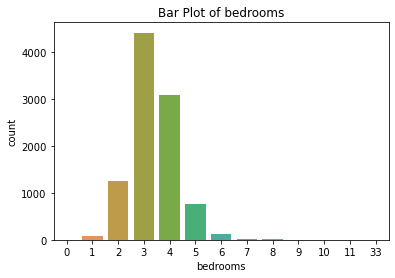

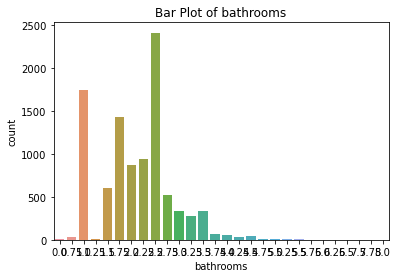

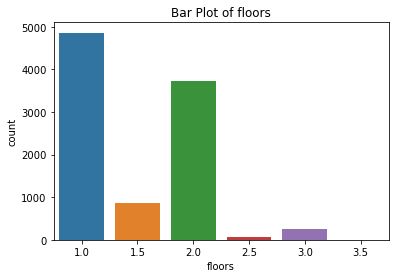

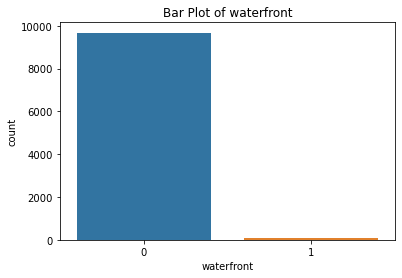

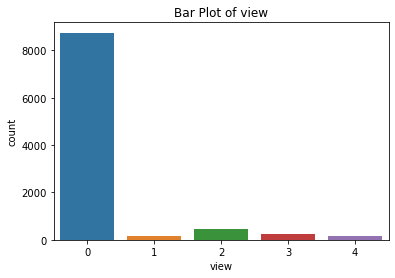

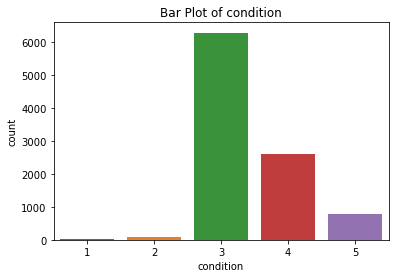

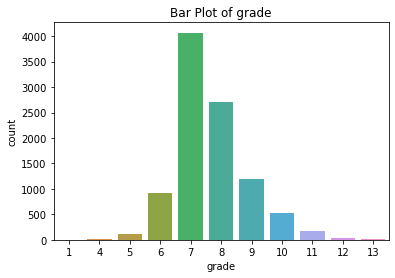

In [12]:
for variable in discrete_variables:          #for each variable in discrete_variables do:
        plt.figure()                          #to create a new figure with customizations
        plt.clf()                             #to clear the entire current figure
        sns.countplot(df[variable]).set_title('Bar Plot of '+ variable) #Plotting barplot for column and Setting up the title
        #df.plot.bar(variable)
        #plt.bar(variable)

In [595]:
#Univariate analysis of continuous variables
df[continuous_variables].describe()  #statistical summary

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,9.761000e+03,9761.000000,9.761000e+03,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000
mean,5.427350e+05,2086.734146,1.521526e+04,1793.291159,293.442987,1970.799508,86.066592,47.560052,-122.214322,1992.359697,12824.785165
std,3.795276e+05,927.194303,4.126673e+04,835.763817,442.612722,29.240009,405.417369,0.140236,0.139895,687.322247,26518.337402
min,8.000000e+04,290.000000,5.200000e+02,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.514000,620.000000,660.000000
25%,3.200000e+05,1420.000000,5.100000e+03,1190.000000,0.000000,1951.000000,0.000000,47.467800,-122.327000,1490.000000,5160.000000
50%,4.500000e+05,1910.000000,7.642000e+03,1570.000000,0.000000,1975.000000,0.000000,47.572200,-122.229000,1840.000000,7660.000000
75%,6.490000e+05,2570.000000,1.066000e+04,2230.000000,570.000000,1996.000000,0.000000,47.680400,-122.126000,2370.000000,10113.000000
max,7.700000e+06,12050.000000,1.651359e+06,8860.000000,3480.000000,2015.000000,2015.000000,47.777600,-121.319000,5790.000000,560617.000000


C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


skewness for id = 0.23544659846813135
Kurtosis for id= -1.2665497134269559


C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


skewness for price = 4.2980618120838665
Kurtosis for price= 38.92571599487915
skewness for sqft_living = 1.425825591484237


C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Kurtosis for sqft_living= 4.563590934315643
skewness for sqft_lot = 13.60387975464059
Kurtosis for sqft_lot= 346.54435075031313
skewness for sqft_above = 1.4527483169440447
Kurtosis for sqft_above= 3.404209642036738


C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


skewness for sqft_basement = 1.4700830337421202
Kurtosis for sqft_basement= 1.709084533795696
skewness for yr_built = -0.46259123825197745


C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Kurtosis for yr_built= -0.6568681294667256
skewness for yr_renovated = 4.498950793053122
Kurtosis for yr_renovated= 18.245737621987267


C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


skewness for zipcode = 0.4141588415659435
Kurtosis for zipcode= -0.8401431467176486
skewness for lat = -0.4788661902319015
Kurtosis for lat= -0.709558458526709


C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


skewness for long = 0.8766953018685205
Kurtosis for long= 1.0304279152773455
skewness for sqft_living15 = 1.1028334076065052
Kurtosis for sqft_living15= 1.5455580439797827


C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


skewness for sqft_lot15 = 7.755503376203744
Kurtosis for sqft_lot15= 78.870196513143


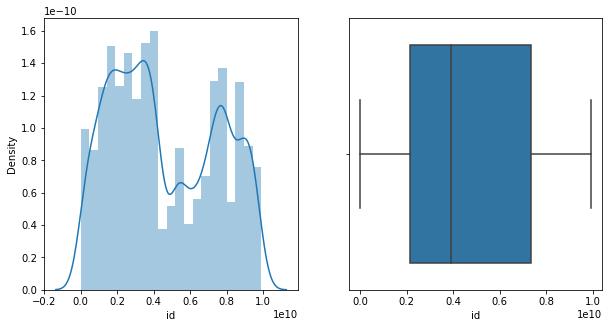

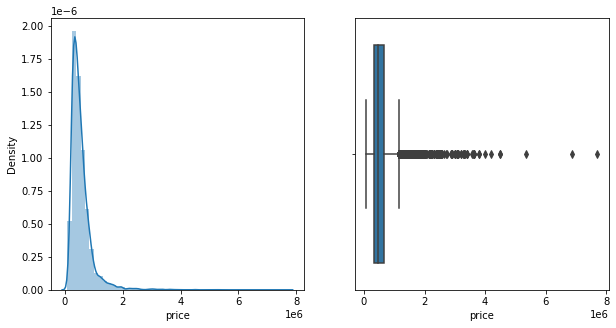

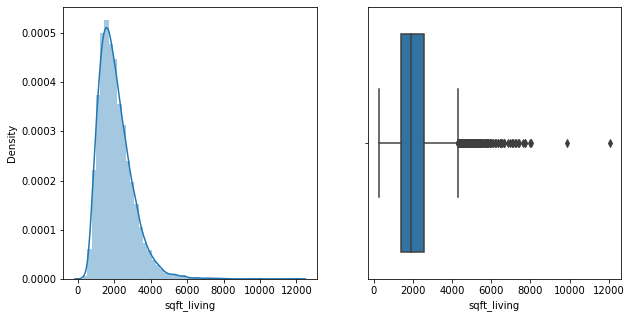

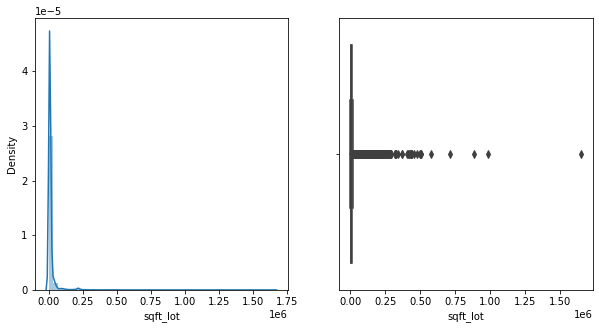

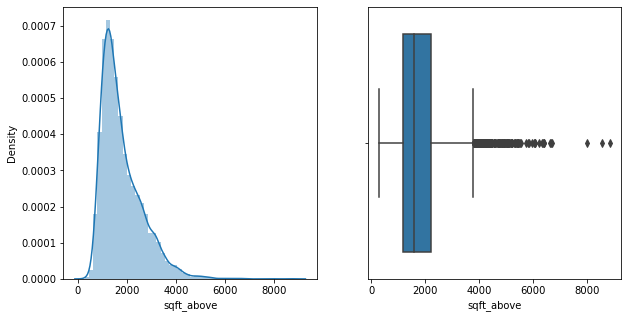

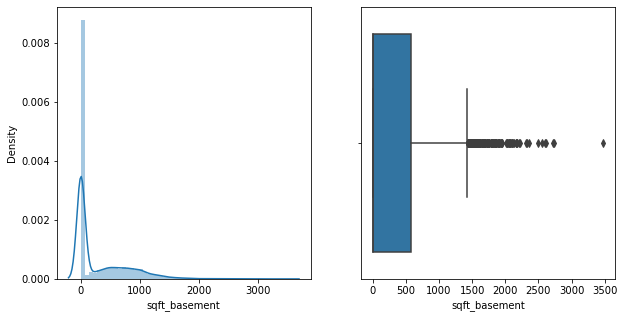

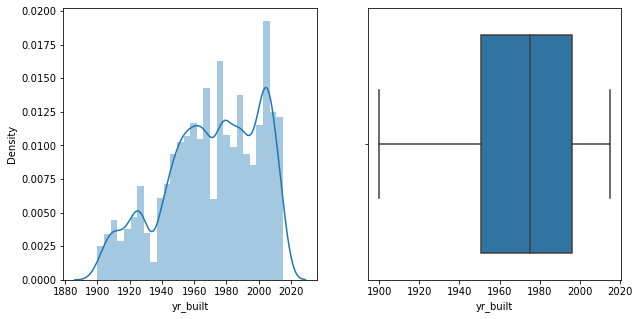

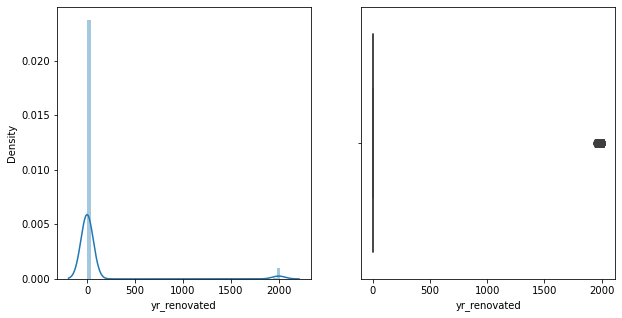

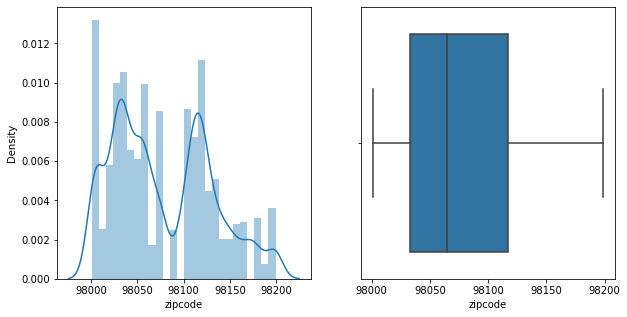

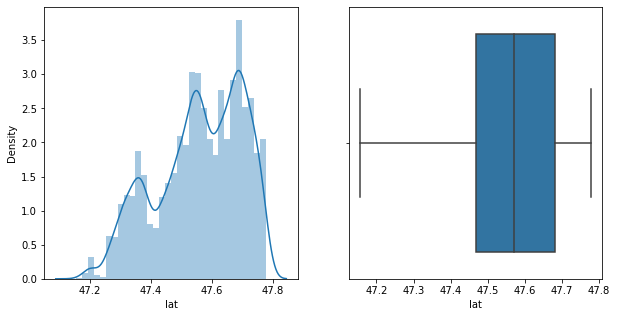

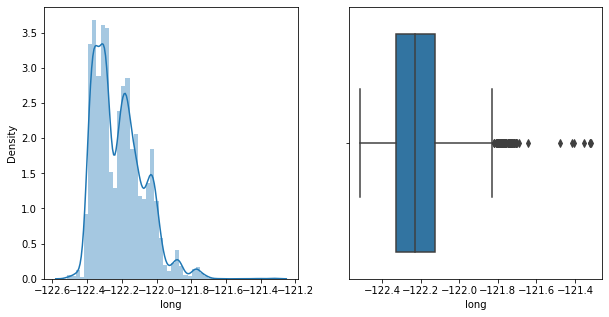

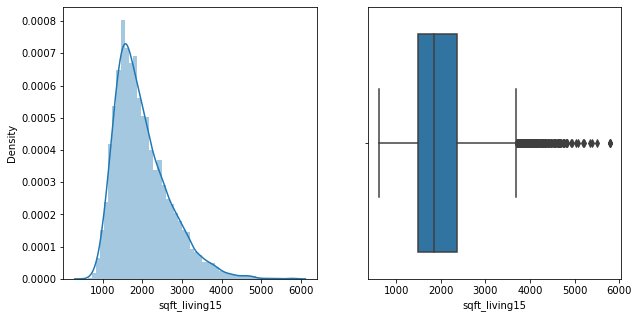

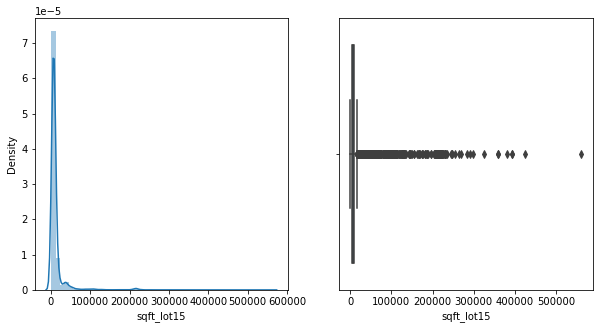

In [13]:
for variable in continuous_variables:          #for each variable in continuous_variables do:
    fig_dims = (10, 5)
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
    sns.distplot(df[variable], kde=True, ax=axs[0])   #plot histogram
    sns.boxplot(x= variable, data=df, ax=axs[1])   #plot boxplot
    print("skewness for {} = {}".format(variable, df[variable].skew()))  #print skewness
    print("Kurtosis for {}= {}".format(variable, df[variable].kurtosis()))  #print kurtosis

Analysis:
#### Price


1. Average price is 5.427350e+05   #mean
2. highest price is 7.700000e+06	
3. minimum price is 8.000000e+04
4. 25% of houses have price less than (or 75% of houses have price greater than) 3.200000e+05	
5. 25 % of houses have price higher than ((or 75% of houses have price lesser than)) 6.490000e+05
6. median- 4.500000e+05
7. 50% of houses have price in between 3.200000e+0535 and 6.490000e+05
8. IQR= 329000 #IQR 
9. Lower Fence= 320000- 1.5*329000
10. Upper Fence= 649000 + 1.5*329000
11. skewness for price = 4.2980618120838665   #highly skewed
12. Kurtosis for price= 38.92571599487915   #leptokurtic

13. Distribution is right skewed 

#### Sqft_living

1. Distribution is right skewed
2. skewness for sqft_living = 1.425825591484237  #highly skewed
3. Kurtosis for sqft_living= 4.563590934315643  #leptokurtic

#### sqft_lot
1. right skewed
2. skewness for sqft_lot = 13.60387975464059 #highly skewed
3. Kurtosis for sqft_lot= 346.54435075031313 #leptokurtic

#### sqft_above
1. Right skewed
2. skewness for sqft_above = 1.4527483169440447    #highly skewed
3. Kurtosis for sqft_above= 3.404209642036738     #leptokurtic

#### sqft_basement
1. right skewed
2. skewness for sqft_basement = 1.4700830337421202   #highly skewed
3. Kurtosis for sqft_basement= 1.709084533795696     # platykurtic

#### yr_built
1. Left skewed
2. skewness for yr_built = -0.46259123825197745  #Fairly symmetrical
3. Kurtosis for yr_built= -0.6568681294667256  #platykuric

#### yr_renovated
1. right skewed
2. skewness for yr_renovated = 4.498950793053122  #Highly skewed
3. Kurtosis for yr_renovated= 18.245737621987267  #leptokurtic

#### lat
1. Left skewed
2. skewness for lat = -0.4788661902319015 #fairly symmetrical
3. Kurtosis for lat= -0.709558458526709 #platykurtic 

#### long
1. Right skewed
2. skewness for long = 0.8766953018685205 #Moderately skewed
3. Kurtosis for long= 1.0304279152773455  #platykurtic

#### sqft_living15
1. Right skewed
2. skewness for sqft_living15 = 1.1028334076065052 #Highly skewed
3. Kurtosis for sqft_living15= 1.5455580439797827 #platykurtic

#### sqft_lot15
1. Right skewed
2. skewness for sqft_lot15 = 7.755503376203744 #Highly skewed
3. Kurtosis for sqft_lot15= 78.870196513143 #leptokurtic

In [14]:
#for date variables:
#date column conversion
df["date"] = df["date"].str.slice(0, 8) # striped only date part 
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d') #converted date string into date
df['yr_sold'] = pd.DatetimeIndex(df['date']).year #extracting year from date for future references
df.head() #display data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
0,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
1,7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,2014
2,9212900260,2014-05-27,468000.0,2,1.00,1160,6000,1.0,0,0,...,860,300,1942,0,98115,47.6900,-122.292,1330,6000,2014
3,114101516,2014-05-28,310000.0,3,1.00,1430,19901,1.5,0,0,...,1430,0,1927,0,98028,47.7558,-122.229,1780,12697,2014
4,6054650070,2014-10-07,400000.0,3,1.75,1370,9680,1.0,0,0,...,1370,0,1977,0,98074,47.6127,-122.045,1370,10208,2014


In [15]:
#Analyzing date time variables
# list of variables that contain year variables
years_variables = [variable for variable in numerical_variables if 'yr' in variable]
years_variables

['yr_built', 'yr_renovated']

In [16]:
# Understanding the year variable
for variable in years_variables:
    print(variable,df[variable].unique())

yr_built [1965 2001 1942 1927 1977 1979 1916 1947 1995 1985 1941 1915 1948 1981
 1996 2014 1959 2003 1966 1953 1955 1950 1954 1989 1968 1973 2005 1956
 2002 1952 1925 1961 1988 1939 1975 1980 1992 1910 1991 2010 1987 1914
 1978 2004 1986 1923 1960 1990 1962 1976 1949 2008 1920 2007 1997 1994
 1993 1999 1983 1904 1940 1928 2006 1937 1982 1969 1929 1957 1964 1913
 1984 1908 1943 1922 1911 1930 1907 2013 1958 1998 1967 1909 1974 1972
 1912 1917 1900 2000 1924 1951 1932 1971 1946 1963 2012 1970 1944 1918
 1905 2009 1936 1926 1906 1902 1938 1919 1903 1921 1931 1901 1933 1945
 2011 1935 2015 1934]
yr_renovated [   0 1992 1994 1978 2005 2008 1984 2014 1974 1983 2013 2003 1945 1990
 1988 1957 1977 1995 2000 1999 1986 2007 1987 1973 2006 2001 1980 1997
 2002 1950 1991 2015 1989 1963 1962 1996 1981 1972 1970 1985 2004 1982
 1993 2010 2011 1971 2009 1998 1969 1940 1976 2012 1946 1964 1975 1953
 1958 1959 1967 1968 1956 1955 1960 1979 1965]


Year renovated = 0 signifies that the house has not been renovated.

#### Bivariate Analysis

#What we think according to research
1. House living area -----------------------------> More area more price 
2. Number of bedrooms more------------------------> more price  
3. Bathrooms -------------------------------------> Doesn't impact as much as the bedrooms 
4. SQFT lot more ---------------------------------> more price 
5. Age of home------------------------------------> older, cheaper 
6. Recent innovation----->atleast renovated------->not renovated (For old building) 
7. Grading ---------------------------------------> Higher, more price
8. floors ----------------------------------------> More floors more price when the sqft area is good. Also, if tower, less area ---------------> more price 
9. water front -----------------------------------> More costly 
10. view ------------------------------------------> good views -->more costly 
11. area (latitude, longitude, zipcode) -----------> good area--> good price 

In [34]:
#Correlation 
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
id,1.000000,-0.005972,-0.002571,0.005821,-0.007559,-0.130303,0.007793,0.000834,0.023355,-0.015321,...,-0.006447,-0.003660,0.027053,-0.024900,-0.012130,0.009167,0.034395,-0.001315,-0.137562,0.011896
price,-0.005972,1.000000,0.300808,0.527532,0.705052,0.094143,0.262954,0.274977,0.399658,0.044732,...,0.611453,0.322383,0.051759,0.120472,-0.055629,0.299280,0.023754,0.584807,0.077943,0.014201
bedrooms,-0.002571,0.300808,1.000000,0.506070,0.560989,0.028895,0.181042,-0.006803,0.079863,0.036135,...,0.462514,0.301829,0.155102,0.018625,-0.148339,-0.010547,0.117168,0.376457,0.018149,-0.005814
bathrooms,0.005821,0.527532,0.506070,1.000000,0.758930,0.079435,0.501899,0.061483,0.182988,-0.115382,...,0.692911,0.281433,0.499589,0.044756,-0.201454,0.018453,0.217697,0.566076,0.068722,-0.012303
sqft_living,-0.007559,0.705052,0.560989,0.758930,1.000000,0.162786,0.366219,0.097203,0.285735,-0.047938,...,0.878989,0.435069,0.322723,0.043627,-0.203761,0.054830,0.240170,0.758081,0.163545,-0.016340
sqft_lot,-0.130303,0.094143,0.028895,0.079435,0.162786,1.000000,-0.003543,0.029420,0.099221,-0.008722,...,0.180913,-0.000601,0.054043,0.001219,-0.126091,-0.092245,0.224524,0.145285,0.719922,0.004337
floors,0.007793,0.262954,0.181042,0.501899,0.366219,-0.003543,1.000000,0.022443,0.031938,-0.265390,...,0.534801,-0.242675,0.481926,0.013655,-0.064479,0.044827,0.134683,0.289238,-0.013269,-0.008066
waterfront,0.000834,0.274977,-0.006803,0.061483,0.097203,0.029420,0.022443,1.000000,0.402725,0.024030,...,0.064297,0.082214,-0.027010,0.101684,0.023656,-0.009410,-0.039227,0.097196,0.028499,-0.014322
view,0.023355,0.399658,0.079863,0.182988,0.285735,0.099221,0.031938,0.402725,1.000000,0.059969,...,0.170286,0.277021,-0.056361,0.109750,0.075834,0.005503,-0.074630,0.292435,0.079904,0.003450
condition,-0.015321,0.044732,0.036135,-0.115382,-0.047938,-0.008722,-0.265390,0.024030,0.059969,1.000000,...,-0.153713,0.189828,-0.357396,-0.055525,0.003410,-0.017622,-0.106514,-0.080423,0.002253,-0.046312


here, price is 
highly correlated with-       sqft_living 
moderate correlation with-    bathrooms	, view	, grade, sqft_above, sqft_living15
weak correlation with-        bedrooms,floors, waterfront, sqft_basement, yr_renovated,lat	
no correlation with-          id, sqft_lot, view, condition	, yr_built, zipcode, long, sqft_lot15, yr_sold

Text(0.5, 1.0, 'House Price vs Year Sold')

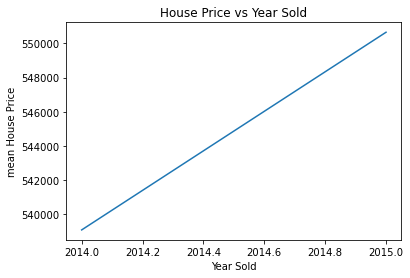

In [17]:
# checking whether there is a relation between year the house is sold and the price

df.groupby('yr_sold')['price'].mean().plot()
plt.xlabel('Year Sold')
plt.ylabel('mean House Price')
plt.title("House Price vs Year Sold")

We can see from the graph as the year increasing house price is also increasing

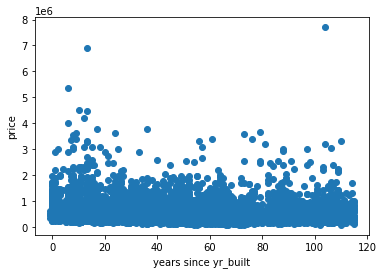

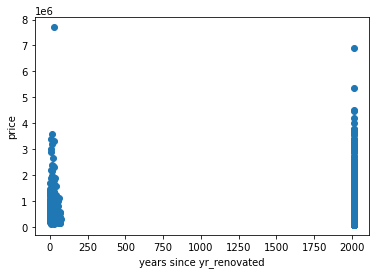

In [25]:
#Analyzing relationship between difference of year variables and year sold with house price

for variable in years_variables:
    if variable!='yr_sold':
        data=df.copy()
        ## taking the difference between year variable and year the house was sold for
        data[variable]=data['yr_sold']-data[variable]
        plt.scatter(data[variable],data['price'])
        plt.xlabel('years since ' +  variable)
        plt.ylabel('price')
        plt.show()

Surprising point-
1. as the years since yr_built increase price should have decreased same applies to the years since year renovated but we can't see this pattern here

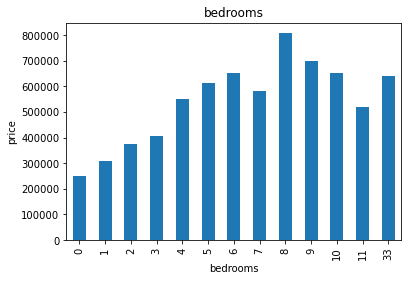

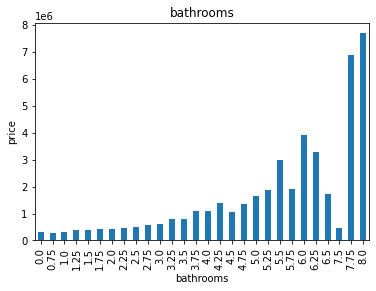

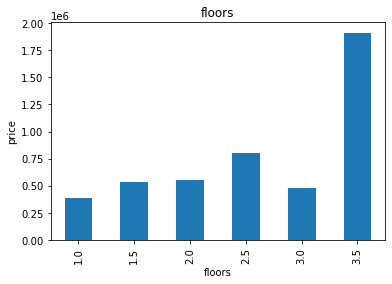

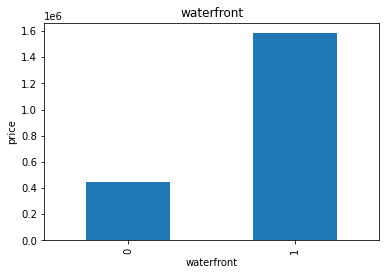

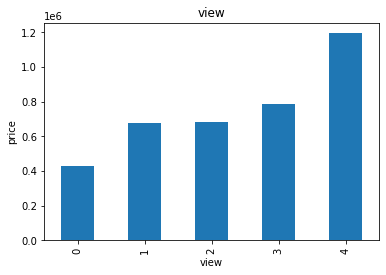

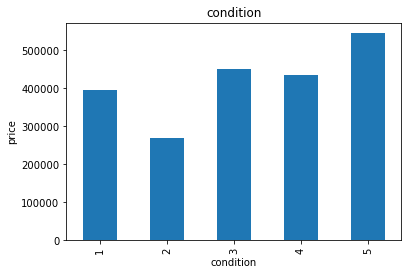

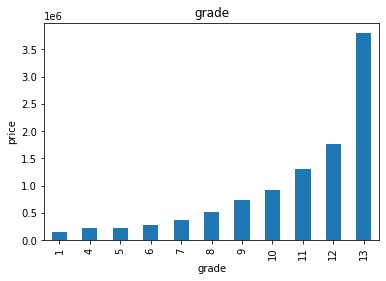

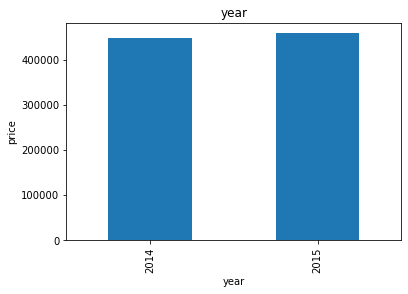

In [597]:
#Bivariate analysis of discrete variables
for variable in discrete_variables:
    df.groupby(variable)['price'].median().plot.bar()
    plt.xlabel(variable)
    plt.ylabel('price')
    plt.title(variable)
    plt.show()

### Bivariate analysis of each discrete variable with price



#### bedroom (t)

1. houses with more number of bedrooms have higher price

#### bathrooms(t)

1. houses with more number of bathrooms have higher price

#### floors (e)

1. as number of floors increases price of house increases (except for 3rd floor)
Q- Do sqft_above plays roll in number of floors? 

#### waterfront (e)

1. houses with waterfront have higher price

#### View (t)

1. As the view rating increases price of house also increases
Q- whether houses having waterfront are given higher view rating?

#### condition (t)

1. houses with higher condition rating (3,4,5) comprise higher prices
Q- Does price of house being high for houses comprising higher condition rating is because of year built ? 

#### Grade (t)

1. As grade increases price of house is increasing exponentially

In [598]:
#checking floor question
df.groupby('floors').sqft_above.median()

floors
1.0    1260.0
1.5    1540.0
2.0    2320.0
2.5    2730.0
3.0    1490.0
3.5    3910.0
Name: sqft_above, dtype: float64

sqft_above contribute in number of floors 

<AxesSubplot:xlabel='condition', ylabel='yr_built'>

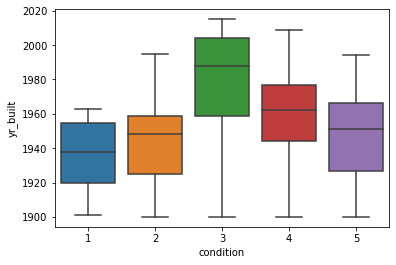

In [599]:
#Checking condition question is true or not
sns.boxplot(x= 'condition', y='yr_built', data= df)

here we can see that houses comprising condition (3,4,5 ) have year built afterward(newer houses)
Hence year built plays role here.
from 3 to 5 we can see that condition rating is higher for earlier built house is it because of renovation? 

<Figure size 576x288 with 0 Axes>

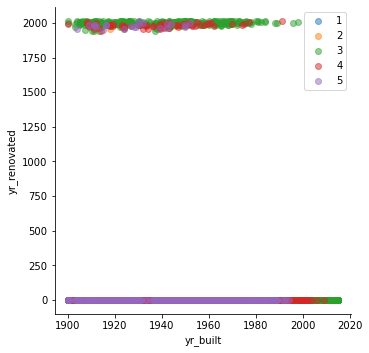

<Figure size 576x288 with 0 Axes>

In [600]:
#checking whether condition rating is correlated with year built and year_renovated both?
g = sns.PairGrid(df,x_vars=['yr_built'],y_vars="yr_renovated",hue= "condition", height=5)
g.map(plt.scatter,alpha=0.5)
plt.legend(loc=(0))
plt.figure(figsize=(8,4))

As we can see in the graph houses with built year earlier which are not renovated has condition rating of 5 
Hence condition is not correlated with year renovated and hence also not with year built.

In [601]:
#checking view question is true or not
df.groupby('waterfront').view.median(), df.groupby('waterfront').view.mean()

(waterfront
 0    0.0
 1    4.0
 Name: view, dtype: float64,
 waterfront
 0    0.218824
 1    3.695122
 Name: view, dtype: float64)

as houses with no waterfront have median rating of 0 and houses with waterfront have median rating of 4,
Waterfront plays role in view rating

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda_install\lib\site-packages\seaborn\axisgrid.py:1242: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
No handles with labels found to put in legend.


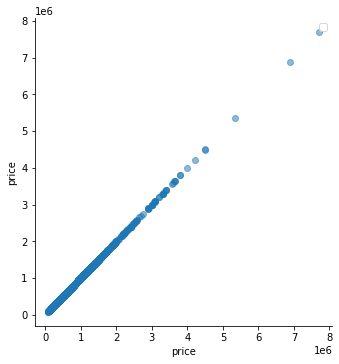

<Figure size 576x288 with 0 Axes>

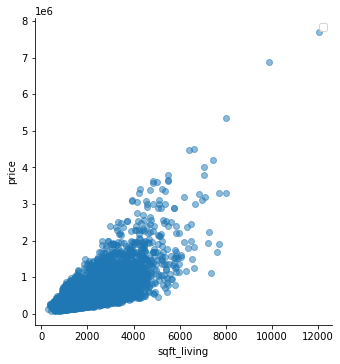

<Figure size 576x288 with 0 Axes>

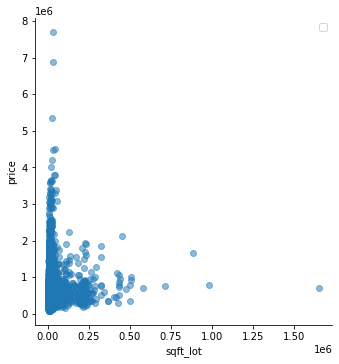

<Figure size 576x288 with 0 Axes>

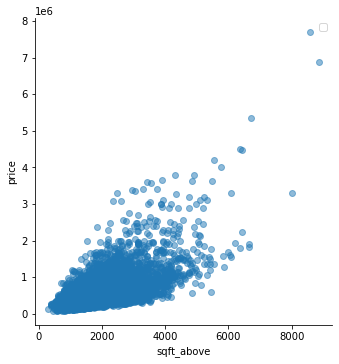

<Figure size 576x288 with 0 Axes>

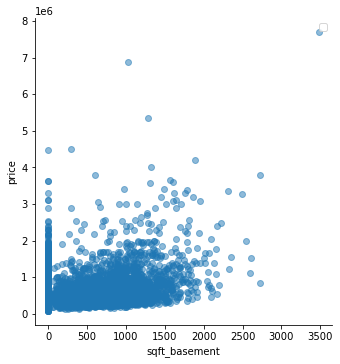

<Figure size 576x288 with 0 Axes>

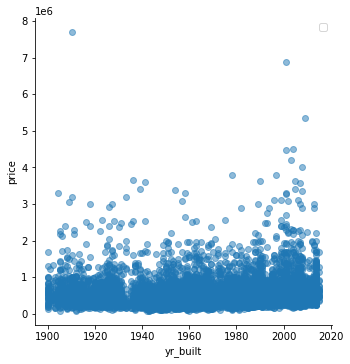

<Figure size 576x288 with 0 Axes>

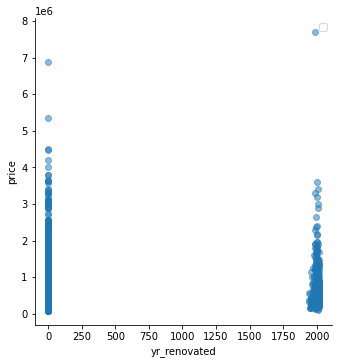

<Figure size 576x288 with 0 Axes>

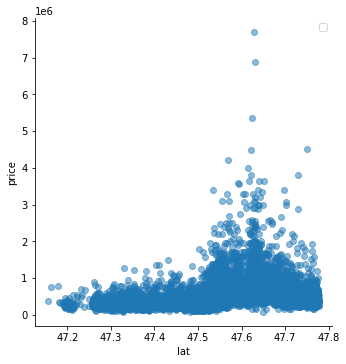

<Figure size 576x288 with 0 Axes>

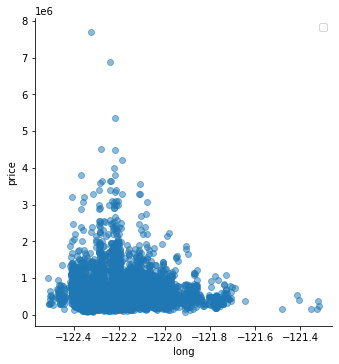

<Figure size 576x288 with 0 Axes>

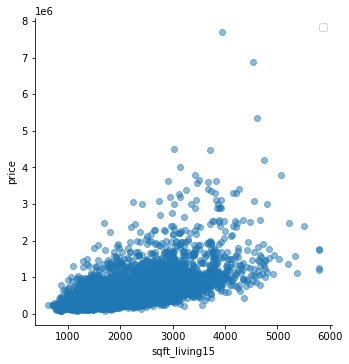

<Figure size 576x288 with 0 Axes>

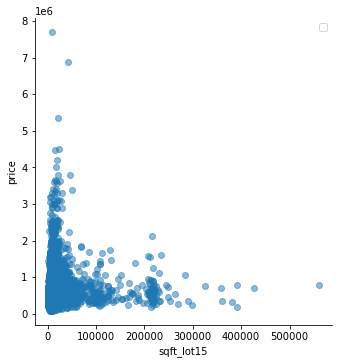

<Figure size 576x288 with 0 Axes>

In [602]:
#Bivariate analysis of continuous variables
for variable in continuous_variables:
    g = sns.PairGrid(df,x_vars=[variable],y_vars="price",height=5)
    g.map(plt.scatter,alpha=0.5)
    plt.legend(loc=(0))
    plt.figure(figsize=(8,4))
    #plt.title("{} vs price".format(variable))

<AxesSubplot:>

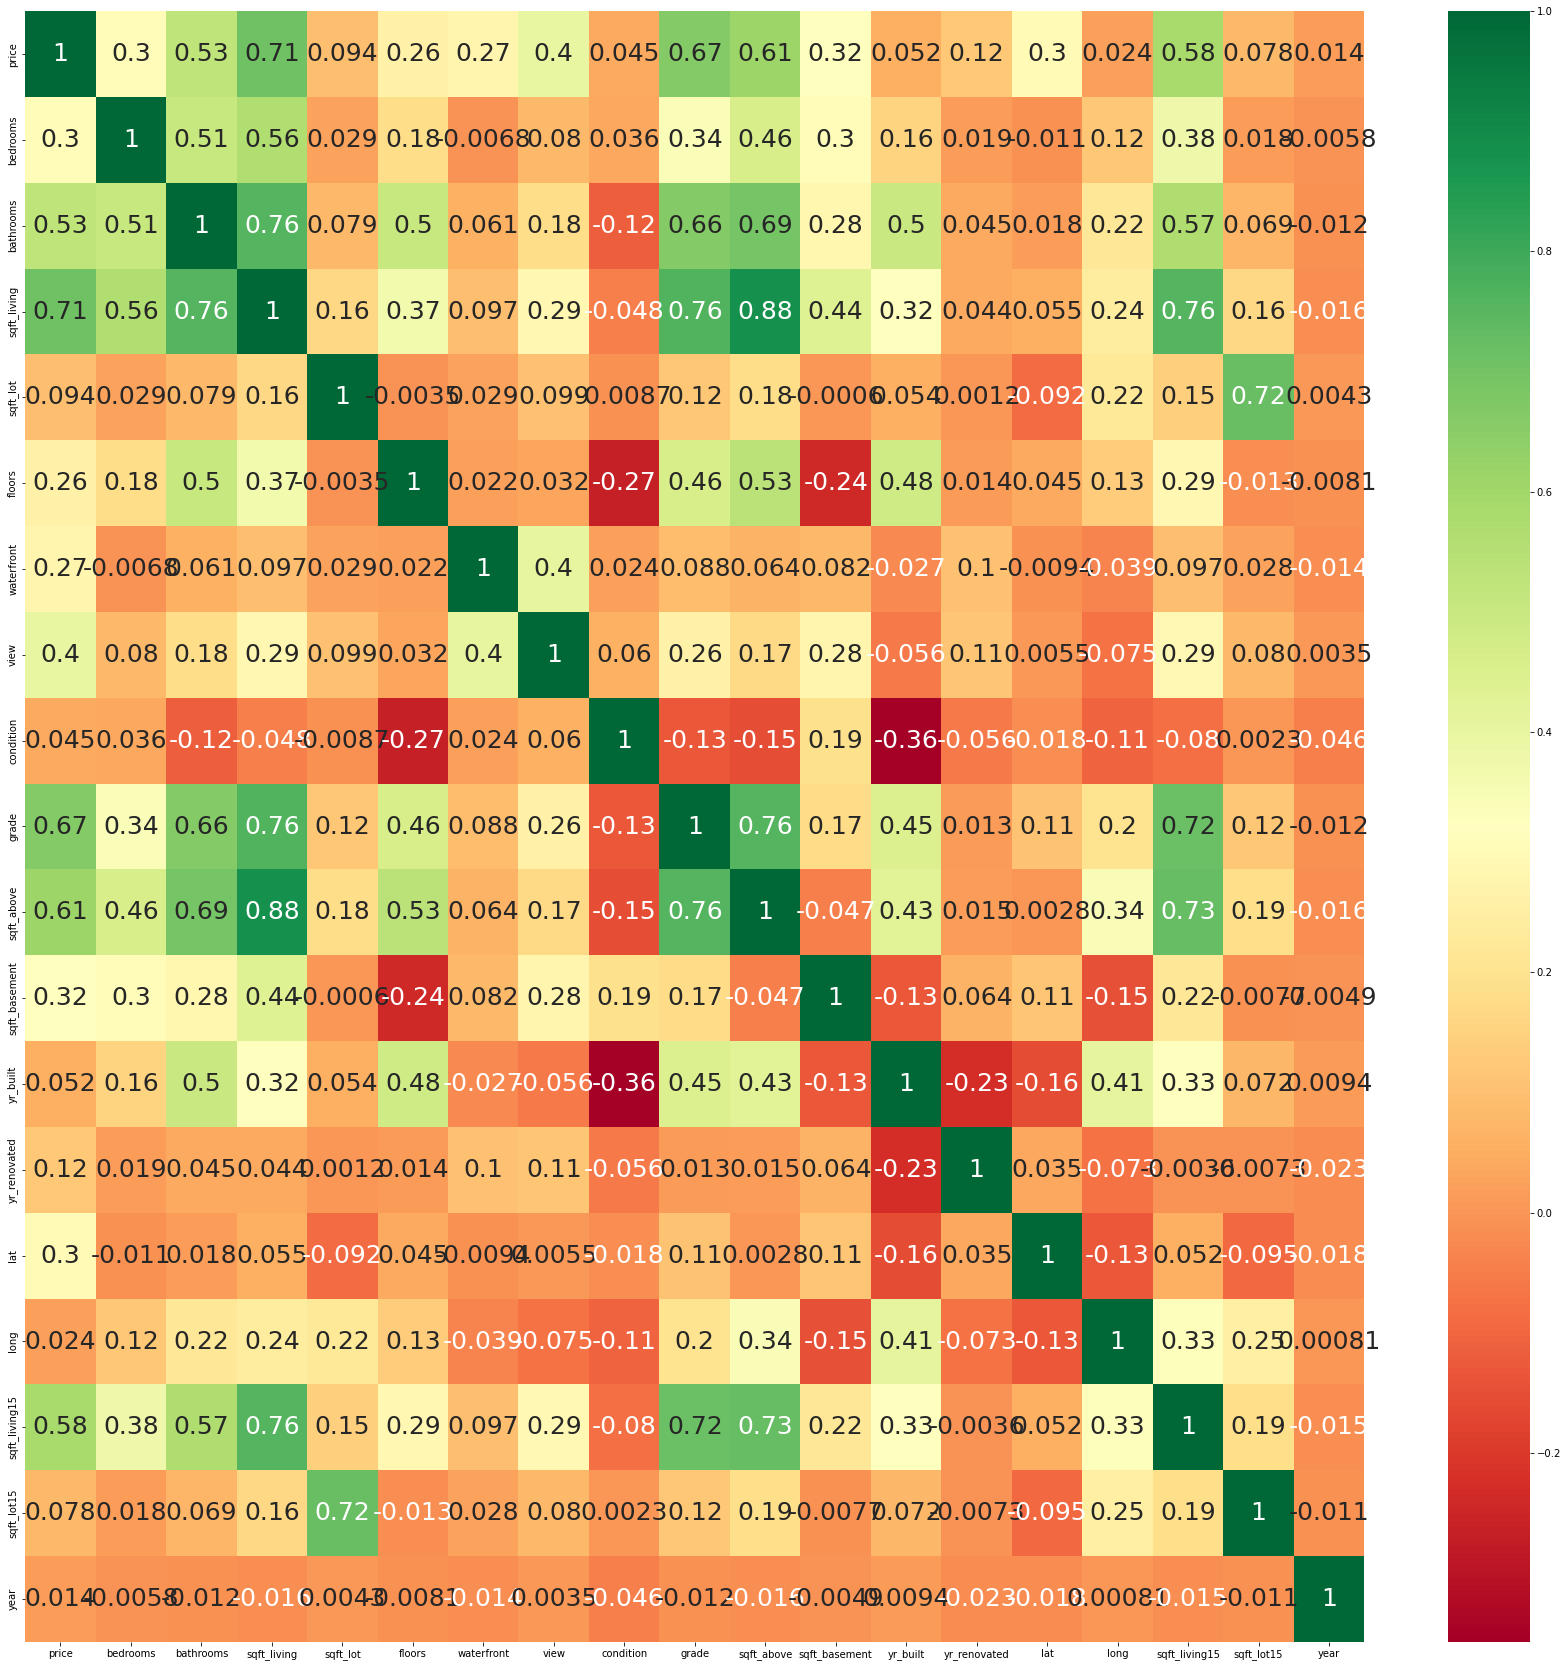

In [603]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":25})

### Bivariate analysis of each continuous variable with price

#### sqft_living (t)

1. Positive correlation (0.71) hence strong positive correlation

#### sqft_lot (e)
1. 0.094 - very weak positive correlation

#### sqft above (t)

1. 0.61 moderate positive correlation

#### sqft_basement (e)

1. 0.32 weak positive correlation

#### year built (e)
1. 0.052 very weak positive correlation
Q- As per our hypothesis The earlier built date of the house result in the lower house price but here newely built also have same prices as earlier built houses have. Is it because earlier built homes are renovated ? 

#### year renovated (c)
1. 0.12  weak +ve correlation

Q- As per our hypothesis, renovated houses results in higher house price but here houses which are not renovated also have higher prices. Is it because they are newely built?

#### lat (c)
1. 0.3 weak positive correlation
If we see in graph at specific lat, house prices are higher

#### long
1. 0.024 very weak positive correlation
If we see in graph at specific long, house prices are higher

#### sqft living 15 (t)
1. 0.58 moderate positive correlation

#### sqft lot 15 (e)
1. 0.078 very very weak positive correlation

No handles with labels found to put in legend.


<Figure size 576x288 with 0 Axes>

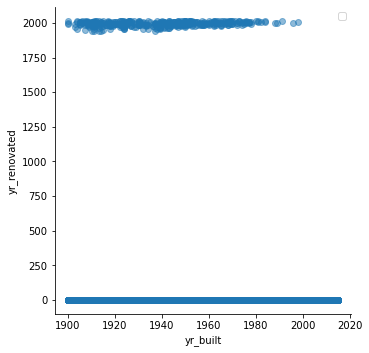

<Figure size 576x288 with 0 Axes>

In [604]:
#checking question in year_renovated
g = sns.PairGrid(df,x_vars=['yr_built'],y_vars="yr_renovated",height=5)
g.map(plt.scatter,alpha=0.5)
plt.legend(loc=(0))
plt.figure(figsize=(8,4))

surprise points

1. years built is not affecting price (very very weak +ve relation)
2. sqft basement affecting the price 

Selected Features set 1 - bedroom, bathroom,  sqft_living, sqft_living 15, condition, view, grade, sqft_basement, sqft above

Selected this features as we have concluded from the EDA

Selcted Featutres set2 - bedroom, sqft_living , sqft_living15 ,floors, view, grade, yr_built, lat, date

Selected this features because
1. from set 1 rmoved bathroom as while buying people are more concerned towards bedrooms than bathrooms
2. Taken sq_ft living and sq_ft living 15 but eliminated sqft_basement because people more more concerned towards living area and not towards basement area 
3. Added floors instead of sqft_above as floors and sqft_living can cover up for the sqft_above
4. added yr_built, as definitely age of house plays role in the price of house
5. Added lat, as location of house also plays important role
6. date is also added as when you are selling your house matters alot. because as time increases price value also increases 

### PT. 3

In [605]:

#For test-train split
from sklearn.model_selection import train_test_split

#For fitting regression tree
from sklearn.tree import DecisionTreeRegressor

#To create a confusion matrix
from sklearn.metrics import confusion_matrix

#For plotting a decision tree
from sklearn import tree

#for cross validation
from sklearn.model_selection import cross_val_score

#for R2 
from sklearn.metrics import r2_score

### Predictor and Target

In [606]:
#on set1
X_train = df[["bedrooms", "bathrooms", "sqft_living", "sqft_living15", "condition", "view", "grade", "sqft_basement", "sqft_above"]]
y_train = df.price

In [607]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_living15,condition,view,grade,sqft_basement,sqft_above
0,4,3.00,1960,1360,5,0,7,910,1050
1,4,4.50,5420,4760,3,0,11,1530,3890
2,2,1.00,1160,1330,4,0,7,300,860
3,3,1.00,1430,1780,4,0,7,0,1430
4,3,1.75,1370,1370,4,0,7,0,1370


Using cross validation

In [608]:
depth = np.arange(1,15) #depth in range of 1 to 15
cv_scores = [] #empty list that will hold cv_scores

# performing 10-fold cross validation
for k in depth: #for each depth in depth from 1 to 15
    reg_tree = DecisionTreeRegressor(max_depth=k, min_samples_leaf=5) #regression tree model
    score= cross_val_score(reg_tree, X_train, y_train, cv=10, scoring ="neg_mean_squared_error" ) #10 fold cross validation
    #used mean squared error, mse as a scoring metric 
    cv_scores.append(score.mean()) #appending mean of all scores for specific cross validation in cv_scores

In [609]:
#Calculating RMSE
RMSE= [np.sqrt(-score) for score in cv_scores]  #used -score because mse retuen negative value 
RMSE

[319391.2512895025,
 278613.54198776104,
 269679.13649832585,
 259333.42938377353,
 254514.9743740518,
 250367.3024767019,
 252100.37071787362,
 253816.97627782804,
 253832.23027657627,
 255129.06260806433,
 256308.31012640832,
 257625.53318686652,
 260729.44085337347,
 261156.0291902067]

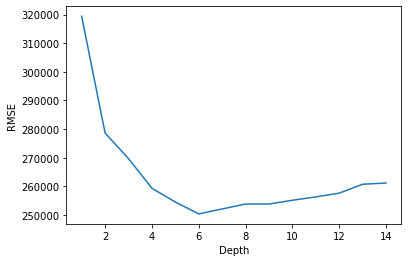

In [611]:
# plot RMSE vs depth
plt.plot(depth, RMSE)
plt.xlabel('Depth')
plt.ylabel('RMSE')
plt.show()

In [612]:
depth = np.arange(1,15) #depth in range of 1 to 15
cv_scores = [] #empty list that will hold cv_scores

# performing 10-fold cross validation
for k in depth: #for each depth in depth from 1 to 15
    reg_tree = DecisionTreeRegressor(max_depth=k, min_samples_leaf=5) #regression tree model
    score= cross_val_score(reg_tree, X_train, y_train, cv=10, scoring ="r2" ) #10 fold cross validation
    #used r2 rsquared as a scoring metric 
    cv_scores.append(score.mean()) #appending mean of all scores for specific cross validation in cv_scores

In [613]:
cv_scores

[0.2855692984114689,
 0.45710502883893334,
 0.48675839427500434,
 0.5215149180265749,
 0.537746455592241,
 0.5481842042296301,
 0.5483374886357929,
 0.5463520127491475,
 0.5400267778699519,
 0.5298886282322218,
 0.5247020380926091,
 0.5199803284083053,
 0.5184577740673715,
 0.5105623722066887]

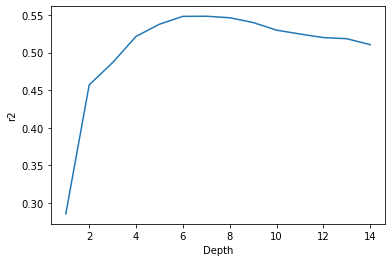

In [614]:
# plot R2 vs depth
plt.plot(depth, cv_scores)
plt.xlabel('Depth')
plt.ylabel('r2')
plt.show()

Taking depth as 5, 6,7 ,8

#### Final Testing on set1 

In [615]:
#Read the house_price test data
df_test = pd.read_csv("kc_house_test_data.csv")

In [616]:
X_test = df_test[["bedrooms", "bathrooms", "sqft_living", "sqft_living15", "condition", "view", "grade", "sqft_basement", "sqft_above"]]
y_test = df_test.price

In [617]:
# instantiate learning model (depth = 5)
reg_tree = DecisionTreeRegressor(max_depth=5, min_samples_leaf=5)

# fitting the model
reg_tree.fit(X_train, y_train)

#Prediction
y_pred = reg_tree.predict(X_test)

# RMSE
print("RMSE", np.sqrt(np.mean((y_test - y_pred)**2)))

#R2
print("R2", r2_score(y_test, y_pred))

RMSE 248143.22514379004
R2 0.5204754650768053


In [618]:
# instantiate learning model (depth = 6)
reg_tree = DecisionTreeRegressor(max_depth=6, min_samples_leaf=5)

# fitting the model
reg_tree.fit(X_train, y_train)

#Prediction
y_pred = reg_tree.predict(X_test)

# RMSE
print("RMSE", np.sqrt(np.mean((y_test - y_pred)**2)))

#R2
print("R2", r2_score(y_test, y_pred))

RMSE 243992.32798546265
R2 0.5363840921765632


In [619]:
# instantiate learning model (depth = 7)
reg_tree = DecisionTreeRegressor(max_depth=7, min_samples_leaf=5)

# fitting the model
reg_tree.fit(X_train, y_train)

#Prediction
y_pred = reg_tree.predict(X_test)

# RMSE
print("RMSE", np.sqrt(np.mean((y_test - y_pred)**2)))

#R2
print("R2", r2_score(y_test, y_pred))

RMSE 237591.55885501133
R2 0.560389555813612


In [620]:
# instantiate learning model (depth = 8)
reg_tree = DecisionTreeRegressor(max_depth=8, min_samples_leaf=5)

# fitting the model
reg_tree.fit(X_train, y_train)

#Prediction
y_pred = reg_tree.predict(X_test)

# RMSE
print("RMSE", np.sqrt(np.mean((y_test - y_pred)**2)))

#R2
print("R2", r2_score(y_test, y_pred))

RMSE 237713.81638088965
R2 0.5599370185814099


AS RMSE is lower and R2 is higher for depth 8 choosing max_depth as 8

R2 of 0.55 says that 55. 67 % of the variation in the price is explained by the predictors

In [621]:
#PERFORMING ON SET2 selected -bedroom, sqft_living , sqft_living15 ,floors, view, grade, yr_built, lat, date(here year)
X_train = df[["bedrooms","sqft_living", "sqft_living15","floors", "view", "grade", "yr_built", "lat", "year"]] 
y_train = df.price

In [622]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year
0,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014
1,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,47.6561,-122.005,4760,101930,2014
2,2014-05-27,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,47.6900,-122.292,1330,6000,2014
3,2014-05-28,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,47.7558,-122.229,1780,12697,2014
4,2014-10-07,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,47.6127,-122.045,1370,10208,2014


In [623]:
X_train.head()

,bedrooms,sqft_living,sqft_living15,floors,view,grade,yr_built,lat,year
0,4,1960,1360,1.0,0,7,1965,47.5208,2014
1,4,5420,4760,1.0,0,11,2001,47.6561,2014
2,2,1160,1330,1.0,0,7,1942,47.6900,2014
3,3,1430,1780,1.5,0,7,1927,47.7558,2014
4,3,1370,1370,1.0,0,7,1977,47.6127,2014


In [624]:
depth = np.arange(1,15) #depth in range of 1 to 15
cv_scores = [] #empty list that will hold cv_scores

# performing 10-fold cross validation
for k in depth: #for each depth in depth from 1 to 15
    reg_tree = DecisionTreeRegressor(max_depth=k, min_samples_leaf=5) #regression tree model
    score= cross_val_score(reg_tree, X_train, y_train, cv=10, scoring ="neg_mean_squared_error" ) #10 fold cross validation
    #used mean squared error, mse as a scoring metric 
    cv_scores.append(score.mean()) #appending mean of all scores for specific cross validation in cv_scores

In [625]:
#Calculating RMSE
RMSE= [np.sqrt(-score) for score in cv_scores]  #used -score because mse retuen negative value 
RMSE

[319391.2512895025,
 274522.5133338379,
 254998.82409028517,
 241947.08301070955,
 232094.6596377259,
 225829.9707251604,
 221986.90756111767,
 218494.36252707473,
 217129.89873947093,
 216624.04417095685,
 216920.6445439586,
 217904.4204637504,
 219313.45636892348,
 219636.39477867502]

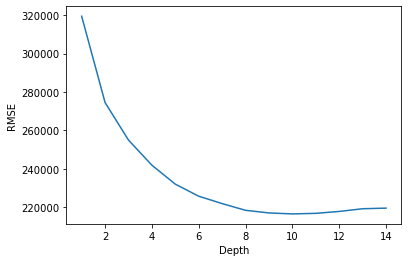

In [626]:
# plot RMSE vs depth
plt.plot(depth, RMSE)
plt.xlabel('Depth')
plt.ylabel('RMSE')
plt.show()

In [627]:
depth = np.arange(1,15) #depth in range of 1 to 15
cv_scores = [] #empty list that will hold cv_scores

# performing 10-fold cross validation
for k in depth: #for each depth in depth from 1 to 15
    reg_tree = DecisionTreeRegressor(max_depth=k, min_samples_leaf=5) #regression tree model
    score= cross_val_score(reg_tree, X_train, y_train, cv=10, scoring ="r2" ) #10 fold cross validation
    #used r2 rsquared as a scoring metric 
    cv_scores.append(score.mean()) #appending mean of all scores for specific cross validation in cv_scores

In [628]:
cv_scores

[0.2855692984114689,
 0.4712526543907615,
 0.5421363466191471,
 0.5829339923538492,
 0.615041179375882,
 0.6377478420256839,
 0.6503045957668704,
 0.6619636681093042,
 0.666675930358806,
 0.6688764730913238,
 0.6676310687473642,
 0.6651738767713707,
 0.6606887664321793,
 0.6593977703075886]

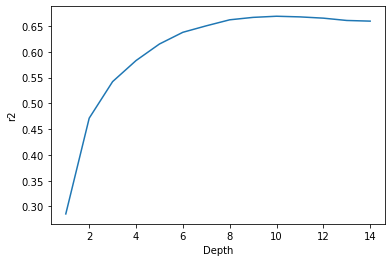

In [629]:
# plot R2 vs depth
plt.plot(depth, cv_scores)
plt.xlabel('Depth')
plt.ylabel('r2')
plt.show()

Taking depth as 9,10,11 for final testing

#### Final Testing on set2 

In [635]:
#Read the house_price test data
df_test = pd.read_csv("kc_house_test_data.csv")

In [636]:
#making year column in test data
#date column conversion
df_test["date"] = df_test["date"].str.slice(0, 8) # striped only date part 
df_test['date'] = pd.to_datetime(df_test['date'], format='%Y%m%d') #converted date string into date
df_test['year'] = pd.DatetimeIndex(df_test['date']).year
df_test.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
0,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,2015
1,1175000570,2015-03-12,530000.0,5,2.00,1810,4850,1.5,0,0,3,7,1810,0,1900,0,98107,47.6700,-122.394,1360,4850,2015
2,16000397,2014-12-05,189000.0,2,1.00,1200,9850,1.0,0,0,4,7,1200,0,1921,0,98002,47.3089,-122.210,1060,5095,2014
3,461000390,2014-06-24,687500.0,4,1.75,2330,5000,1.5,0,0,4,7,1510,820,1929,0,98117,47.6823,-122.368,1460,5000,2014
4,7895500070,2015-02-13,240000.0,4,1.00,1220,8075,1.0,0,0,2,7,890,330,1969,0,98001,47.3341,-122.282,1290,7800,2015


In [637]:
X_test = df_test[["bedrooms","sqft_living", "sqft_living15","floors", "view", "grade", "yr_built", "lat", "year"]]
y_test = df_test.price

In [638]:
# instantiate learning model (depth = 9)
reg_tree = DecisionTreeRegressor(max_depth=9, min_samples_leaf=5)

# fitting the model
reg_tree.fit(X_train, y_train)

#Prediction
y_pred = reg_tree.predict(X_test)

# RMSE
print("RMSE", np.sqrt(np.mean((y_test - y_pred)**2)))

#R2
print("R2", r2_score(y_test, y_pred))

RMSE 200087.65757699774
R2 0.6882211952784953


In [639]:
# instantiate learning model (depth = 10)
reg_tree = DecisionTreeRegressor(max_depth=10, min_samples_leaf=5)

# fitting the model
reg_tree.fit(X_train, y_train)

#Prediction
y_pred = reg_tree.predict(X_test)

# RMSE
print("RMSE", np.sqrt(np.mean((y_test - y_pred)**2)))

#R2
print("R2", r2_score(y_test, y_pred))

RMSE 200427.6591271025
R2 0.6871607066546443


In [640]:
# instantiate learning model (depth = 11)
reg_tree = DecisionTreeRegressor(max_depth=11, min_samples_leaf=5)

# fitting the model
reg_tree.fit(X_train, y_train)

#Prediction
y_pred = reg_tree.predict(X_test)

# RMSE
print("RMSE", np.sqrt(np.mean((y_test - y_pred)**2)))

#R2
print("R2", r2_score(y_test, y_pred))

RMSE 201874.87323590452
R2 0.6826266019816207


Choosing max_depth as 10 for set2

### Discussion on set 1 and set2 results 

###### for set 1
RMSE= 237713.81638088965 & 
R2= 0.5599370185814099

###### for set 2 

RMSE= 200427.6591271025 & 
R2= 0.6871607066546443


1. As we can see that predictors in set 2 are better predicting the price 

### PT. 4

If we see our continuous variables distributions were not normally distributed, they were skewed.
Here using logarrithmic transformations because our variables are right skewed

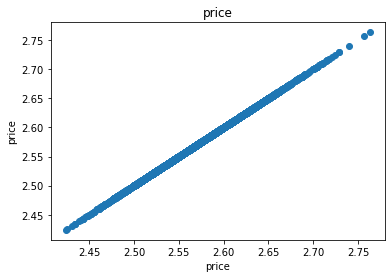

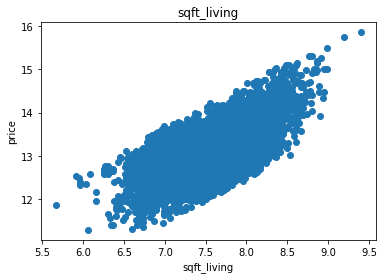

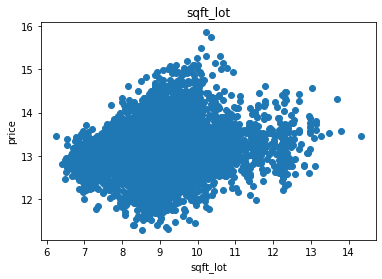

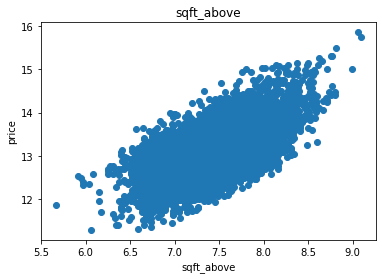

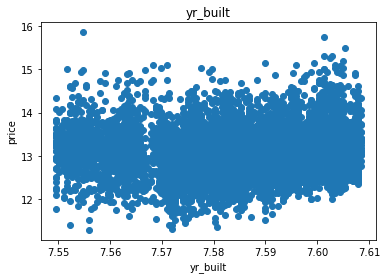

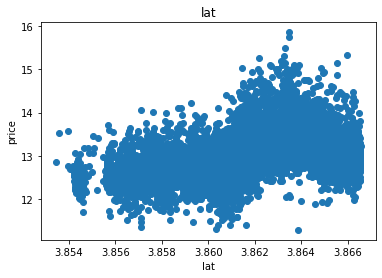

C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda_install\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


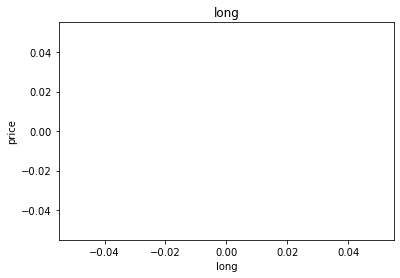

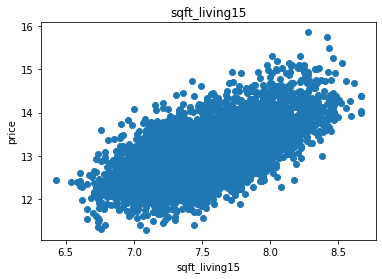

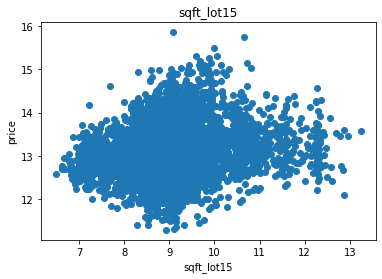

In [641]:
#Logarithmic transformation of continuous variables
#Plotting scatter plots
for variable in continuous_variables: #for
    data=df.copy()
    if 0 in data[variable].unique(): #because log of 0 is undefined 
        pass
    else:
        data[variable]=np.log(data[variable])  #applying log to variable
        data['price']=np.log(data['price'])    # applying log to price
        plt.scatter(data[variable],data['price']) #plotting scatter plot
        plt.xlabel(variable) #labeling x axis
        plt.ylabel('price') #labeling y axis
        plt.title(variable) #labeling title
        plt.show()

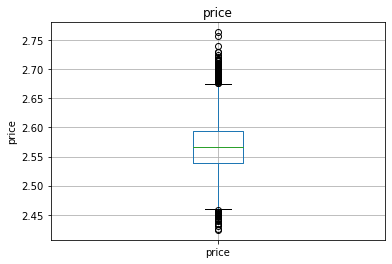

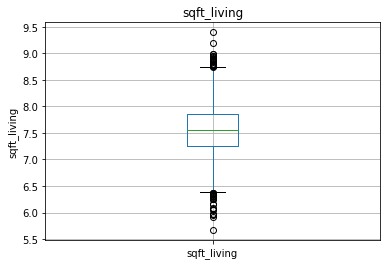

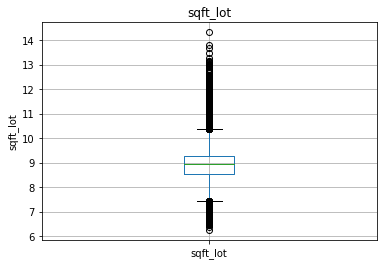

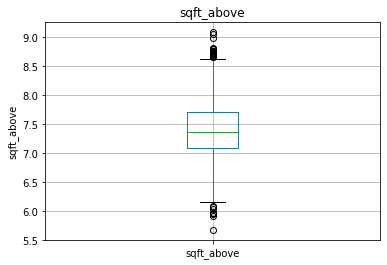

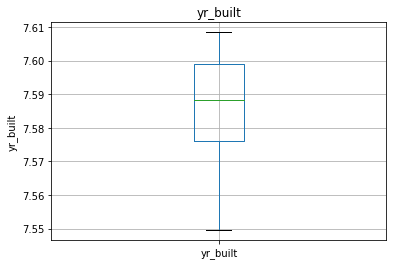

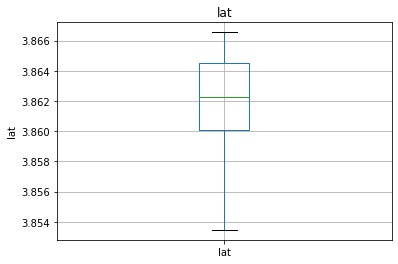

C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda_install\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


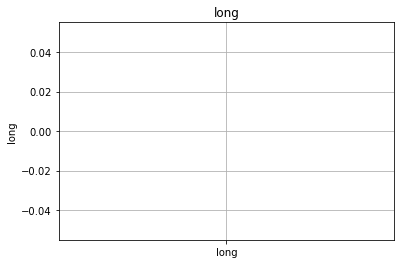

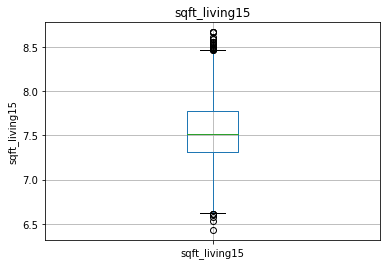

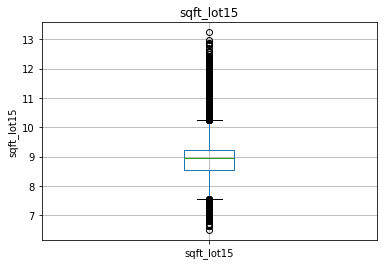

In [642]:
#plotting boxplots
for variable in continuous_variables: #for
    data=df.copy()
    if 0 in data[variable].unique(): #because log of 0 is undefined 
        pass
    else:
        data[variable]=np.log(data[variable])  #applying log to variable
        data['price']=np.log(data['price'])    # applying log to price
        data.boxplot(column=variable) #plotting boxplot
        plt.ylabel(variable)
        plt.title(variable)
        plt.show()

In [643]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year
0,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014
1,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,47.6561,-122.005,4760,101930,2014
2,2014-05-27,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,47.6900,-122.292,1330,6000,2014
3,2014-05-28,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,47.7558,-122.229,1780,12697,2014
4,2014-10-07,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,47.6127,-122.045,1370,10208,2014


In [644]:
df['year_built']=df['year']-df['yr_built'] #converting into year_built into age 

df['yr_renovated'] = df['year']-df['yr_renovated'] #conerting year renovated into age of house since renovation
df.head()#displaying data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,year_built
0,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,2014,47.5208,-122.393,1360,5000,2014,49
1,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,2014,47.6561,-122.005,4760,101930,2014,13
2,2014-05-27,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,2014,47.6900,-122.292,1330,6000,2014,72
3,2014-05-28,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,2014,47.7558,-122.229,1780,12697,2014,87
4,2014-10-07,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,2014,47.6127,-122.045,1370,10208,2014,37


In [645]:
# putting 0 where yr_renvated= yr_sold
for i in range (len(df)):
    if df['year'][i] == df['yr_renovated'][i]:
        df['yr_renovated'][i] =0
        print(df['yr_renovated'][i])

C:\Users\RAHUL\AppData\Local\Temp/ipykernel_6888/3380915267.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['yr_renovated'][i] =0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [646]:
df.head(50)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,year_built
0,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,49
1,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,47.6561,-122.005,4760,101930,2014,13
2,2014-05-27,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,47.6900,-122.292,1330,6000,2014,72
3,2014-05-28,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,47.7558,-122.229,1780,12697,2014,87
4,2014-10-07,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,47.6127,-122.045,1370,10208,2014,37
5,2015-01-24,650000.0,4,3.00,2950,5000,2.0,0,3,3,9,1980,970,1979,0,47.5714,-122.375,2140,4000,2015,36
6,2014-05-29,485000.0,4,1.00,1600,4300,1.5,0,0,4,7,1600,0,1916,0,47.6648,-122.343,1610,4300,2014,98
7,2014-05-14,385000.0,4,1.75,1620,4980,1.0,0,0,4,7,860,760,1947,0,47.7025,-122.341,1400,4980,2014,67
8,2014-07-03,285000.0,5,2.50,2270,6300,2.0,0,0,3,8,2270,0,1995,0,47.3266,-122.169,2240,7005,2014,19
9,2014-05-16,252700.0,2,1.50,1070,9643,1.0,0,0,3,7,1070,0,1985,0,47.3533,-122.166,1220,8386,2014,29


In [647]:
#applying log normal distribution
for variable in df:
    for i in range (len(df)):
        if df[variable][i] ==0: 
            break
    else:
        print(variable) #taking variables which do not have 0


date
price
sqft_living
sqft_lot
floors
condition
grade
sqft_above
yr_built
lat
long
sqft_living15
sqft_lot15
year


In [648]:
#taking variables which do not have 0 in num_variables_log
num_variables_log=['price', 'sqft_living', 'sqft_lot', 'floors', 'condition', "grade", 'sqft_above','yr_built', "lat",'long','sqft_living15','sqft_lot15' , 'year']

for variable in num_variables_log:
    df[variable]=np.log(df[variable]) #applying log transformation as our distrubution is right skewed 

C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda_install\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [649]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,year_built
0,2014-12-09,13.311329,4,3.00,7.580700,8.517193,0.000000,0,0,1.609438,1.945910,6.956545,910,7.583248,0,3.861168,NaN,7.215240,8.517193,7.607878,49
1,2014-05-12,14.018451,4,4.50,8.597851,11.532042,0.000000,0,0,1.098612,2.397895,8.266164,1530,7.601402,0,3.864011,NaN,8.468003,11.532042,7.607878,13
2,2014-05-27,13.056224,2,1.00,7.056175,8.699515,0.000000,0,0,1.386294,1.945910,6.756932,300,7.571474,0,3.864722,NaN,7.192934,8.699515,7.607878,72
3,2014-05-28,12.644328,3,1.00,7.265430,9.898525,0.405465,0,0,1.386294,1.945910,7.265430,0,7.563720,0,3.866101,NaN,7.484369,9.449121,7.607878,87
4,2014-10-07,12.899220,3,1.75,7.222566,9.177817,0.000000,0,0,1.386294,1.945910,7.222566,0,7.589336,0,3.863100,NaN,7.222566,9.230927,7.607878,37


In [650]:
variable_scaling=[variable for variable in df.columns if variable not in ['date','price']] #taking variables for scaling

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler() #usinng minmax scaler 
scaler.fit(df[variable_scaling]) #applying minmax scaler

C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda_install\lib\site-packages\sklearn\preprocessing\_data.py:400: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda_install\lib\site-packages\sklearn\preprocessing\_data.py:401: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


MinMaxScaler()

In [651]:
scaler.transform(df[variable_scaling]) #giving array

array([[0.12121212, 0.375     , 0.51270461, ..., 0.30023535, 0.        ,
        0.43103448],
       [0.12121212, 0.5625    , 0.78562331, ..., 0.74724025, 0.        ,
        0.12068966],
       [0.06060606, 0.125     , 0.37196594, ..., 0.32726776, 0.        ,
        0.62931034],
       ...,
       [0.12121212, 0.4375    , 0.66904513, ..., 0.33212944, 1.        ,
        0.06034483],
       [0.06060606, 0.09375   , 0.33745575, ..., 0.16489698, 0.        ,
        0.05172414],
       [0.06060606, 0.09375   , 0.33745575, ..., 0.10687021, 0.        ,
        0.06034483]])

In [652]:
#transforming train data and adding price column to it
data = pd.concat([df[[ 'price']].reset_index(drop=True),pd.DataFrame(scaler.transform(df[variable_scaling]), columns=variable_scaling)],axis=1)

In [653]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,year_built
0,13.311329,0.121212,0.37500,0.512705,0.280700,0.000000,0.0,0.0,1.000000,0.758654,0.376281,0.261494,0.572419,0.013333,0.588526,NaN,0.351594,0.300235,0.0,0.431034
1,14.018451,0.121212,0.56250,0.785623,0.654599,0.000000,0.0,0.0,0.682606,0.934870,0.759276,0.439655,0.881356,0.013333,0.805595,NaN,0.912323,0.747240,0.0,0.120690
2,13.056224,0.060606,0.12500,0.371966,0.303312,0.000000,0.0,0.0,0.861353,0.758654,0.317905,0.086207,0.372064,0.013333,0.859886,NaN,0.341610,0.327268,0.0,0.629310
3,12.644328,0.090909,0.12500,0.428112,0.452012,0.323657,0.0,0.0,0.861353,0.758654,0.466614,0.000000,0.240116,0.013333,0.965156,NaN,0.472055,0.438410,0.0,0.758621
4,12.899220,0.090909,0.21875,0.416611,0.362630,0.000000,0.0,0.0,0.861353,0.758654,0.454078,0.000000,0.676022,0.013333,0.736033,NaN,0.354873,0.406059,0.0,0.327586


In [654]:
data.to_csv('X_train.csv',index=False)

In [ ]:
#Doing same for test data

In [712]:
df_test = pd.read_csv("kc_house_test_data.csv")
df_test.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570
1,1175000570,20150312T000000,530000.0,5,2.00,1810,4850,1.5,0,0,3,7,1810,0,1900,0,98107,47.6700,-122.394,1360,4850
2,16000397,20141205T000000,189000.0,2,1.00,1200,9850,1.0,0,0,4,7,1200,0,1921,0,98002,47.3089,-122.210,1060,5095
3,461000390,20140624T000000,687500.0,4,1.75,2330,5000,1.5,0,0,4,7,1510,820,1929,0,98117,47.6823,-122.368,1460,5000
4,7895500070,20150213T000000,240000.0,4,1.00,1220,8075,1.0,0,0,2,7,890,330,1969,0,98001,47.3341,-122.282,1290,7800


In [713]:
#date column conversion
df_test["date"] = df_test["date"].str.slice(0, 8) # striped only date part 
df_test['date'] = pd.to_datetime(df_test['date'], format='%Y%m%d') #converted date string into date
df_test['year'] = pd.DatetimeIndex(df_test['date']).year
df_test.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
0,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,2015
1,1175000570,2015-03-12,530000.0,5,2.00,1810,4850,1.5,0,0,3,7,1810,0,1900,0,98107,47.6700,-122.394,1360,4850,2015
2,16000397,2014-12-05,189000.0,2,1.00,1200,9850,1.0,0,0,4,7,1200,0,1921,0,98002,47.3089,-122.210,1060,5095,2014
3,461000390,2014-06-24,687500.0,4,1.75,2330,5000,1.5,0,0,4,7,1510,820,1929,0,98117,47.6823,-122.368,1460,5000,2014
4,7895500070,2015-02-13,240000.0,4,1.00,1220,8075,1.0,0,0,2,7,890,330,1969,0,98001,47.3341,-122.282,1290,7800,2015


In [714]:
df_test['yr_built']=df_test['year']-df_test['yr_built'] #converting into year_built into age 

df_test['yr_renovated'] = df_test['year']-df_test['yr_renovated'] #conerting year renovated into age of house since renovation
df_test.head()#displaying data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
0,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,12,2015,98038,47.3684,-122.031,2390,7570,2015
1,1175000570,2015-03-12,530000.0,5,2.00,1810,4850,1.5,0,0,3,7,1810,0,115,2015,98107,47.6700,-122.394,1360,4850,2015
2,16000397,2014-12-05,189000.0,2,1.00,1200,9850,1.0,0,0,4,7,1200,0,93,2014,98002,47.3089,-122.210,1060,5095,2014
3,461000390,2014-06-24,687500.0,4,1.75,2330,5000,1.5,0,0,4,7,1510,820,85,2014,98117,47.6823,-122.368,1460,5000,2014
4,7895500070,2015-02-13,240000.0,4,1.00,1220,8075,1.0,0,0,2,7,890,330,46,2015,98001,47.3341,-122.282,1290,7800,2015


In [715]:
# putting 0 where yr_renvated= yr_sold
for i in range (len(df_test)):
    if df_test['year'][i] == df_test['yr_renovated'][i]:
        df_test['yr_renovated'][i] =0
        print(df_test['yr_renovated'][i])

C:\Users\RAHUL\AppData\Local\Temp/ipykernel_6888/3907600387.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['yr_renovated'][i] =0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [716]:
#applying log normal distribution
for variable in df_test:
    for i in range (len(df_test)):
        if df_test[variable][i] ==0: 
            break
    else:
        print(variable) #taking variables which do not have 0


id
date
price
bedrooms
bathrooms
sqft_living
sqft_lot
floors
condition
grade
sqft_above
zipcode
lat
long
sqft_living15
sqft_lot15
year


In [717]:
#taking variables which do not have 0 in num_variables_log
num_variables_log=['price', 'sqft_living', 'sqft_lot', 'floors', 'condition', "grade", 'sqft_above','yr_built', "lat",'long','sqft_living15','sqft_lot15' , 'year']
for variable in num_variables_log:
    df_test[variable]=np.log(df_test[variable]) #applying log transformation as our distrubution is right skewed 

C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda_install\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda_install\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [718]:
df_test.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
0,3793500160,2015-03-12,12.685408,3,2.50,7.544332,8.788746,0.693147,0,0,1.098612,1.94591,7.544332,0,2.484907,0,98038,3.857955,NaN,7.779049,8.931948,7.608374
1,1175000570,2015-03-12,13.180632,5,2.00,7.501082,8.486734,0.405465,0,0,1.098612,1.94591,7.501082,0,4.744932,0,98107,3.864302,NaN,7.215240,8.486734,7.608374
2,16000397,2014-12-05,12.149502,2,1.00,7.090077,9.195227,0.000000,0,0,1.386294,1.94591,7.090077,0,4.532599,0,98002,3.856698,NaN,6.966024,8.536015,7.607878
3,461000390,2014-06-24,13.440817,4,1.75,7.753624,8.517193,0.405465,0,0,1.386294,1.94591,7.319865,820,4.442651,0,98117,3.864560,NaN,7.286192,8.517193,7.607878
4,7895500070,2015-02-13,12.388394,4,1.00,7.106606,8.996528,0.000000,0,0,0.693147,1.94591,6.791221,330,3.828641,0,98001,3.857231,NaN,7.162397,8.961879,7.608374


In [719]:
df_test.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living             float64
sqft_lot                float64
floors                  float64
waterfront                int64
view                      int64
condition               float64
grade                   float64
sqft_above              float64
sqft_basement             int64
yr_built                float64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15           float64
sqft_lot15              float64
year                    float64
dtype: object

In [720]:
df_test.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
0,3793500160,2015-03-12,12.685408,3,2.50,7.544332,8.788746,0.693147,0,0,1.098612,1.94591,7.544332,0,2.484907,0,98038,3.857955,NaN,7.779049,8.931948,7.608374
1,1175000570,2015-03-12,13.180632,5,2.00,7.501082,8.486734,0.405465,0,0,1.098612,1.94591,7.501082,0,4.744932,0,98107,3.864302,NaN,7.215240,8.486734,7.608374
2,16000397,2014-12-05,12.149502,2,1.00,7.090077,9.195227,0.000000,0,0,1.386294,1.94591,7.090077,0,4.532599,0,98002,3.856698,NaN,6.966024,8.536015,7.607878
3,461000390,2014-06-24,13.440817,4,1.75,7.753624,8.517193,0.405465,0,0,1.386294,1.94591,7.319865,820,4.442651,0,98117,3.864560,NaN,7.286192,8.517193,7.607878
4,7895500070,2015-02-13,12.388394,4,1.00,7.106606,8.996528,0.000000,0,0,0.693147,1.94591,6.791221,330,3.828641,0,98001,3.857231,NaN,7.162397,8.961879,7.608374


In [722]:
#replacing infinity values with nan
df_test.replace([np.inf, -np.inf], np.nan, inplace=True)

In [725]:
#taking variables for scaling
variable_scaling=[variable for variable in df_test.columns if variable not in ['id','date','price', 'zipcode']] #taking variables for scaling

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler() #usinng minmax scaler 
scaler.fit(df_test[variable_scaling]) #applying minmax scaler

C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda_install\lib\site-packages\sklearn\preprocessing\_data.py:400: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\RAHUL\monali_praxis_data_science\Anaconda\Anaconda_install\lib\site-packages\sklearn\preprocessing\_data.py:401: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


MinMaxScaler()

In [726]:
#transforming train data and adding price column to it
data = pd.concat([df_test[[ 'price']].reset_index(drop=True),pd.DataFrame(scaler.transform(df_test[variable_scaling]), columns=variable_scaling)],axis=1)

In [727]:
data.to_csv('X_test.csv',index=False)

#### Checking whether performance of the model is improved . 

In [814]:
df_train = pd.read_csv("X_train.csv")
df_train.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,year_built
0,13.311329,0.121212,0.37500,0.512705,0.280700,0.000000,0.0,0.0,1.000000,0.758654,0.376281,0.261494,0.572419,0.013333,0.588526,NaN,0.351594,0.300235,0.0,0.431034
1,14.018451,0.121212,0.56250,0.785623,0.654599,0.000000,0.0,0.0,0.682606,0.934870,0.759276,0.439655,0.881356,0.013333,0.805595,NaN,0.912323,0.747240,0.0,0.120690
2,13.056224,0.060606,0.12500,0.371966,0.303312,0.000000,0.0,0.0,0.861353,0.758654,0.317905,0.086207,0.372064,0.013333,0.859886,NaN,0.341610,0.327268,0.0,0.629310
3,12.644328,0.090909,0.12500,0.428112,0.452012,0.323657,0.0,0.0,0.861353,0.758654,0.466614,0.000000,0.240116,0.013333,0.965156,NaN,0.472055,0.438410,0.0,0.758621
4,12.899220,0.090909,0.21875,0.416611,0.362630,0.000000,0.0,0.0,0.861353,0.758654,0.454078,0.000000,0.676022,0.013333,0.736033,NaN,0.354873,0.406059,0.0,0.327586


In [842]:
#PERFORMING ON SET2 selected -bedroom, sqft_living , sqft_living15 ,floors, view, grade, yr_built, lat, date(here year)
X_train = df_train[["bedrooms","sqft_living", "sqft_living15","floors", "view", "grade", "yr_built", "lat", "year"]] 
y_train = df_train.price

In [843]:
X_train.head()

,bedrooms,sqft_living,sqft_living15,floors,view,grade,yr_built,lat,year
0,0.121212,0.512705,0.351594,0.000000,0.0,0.758654,0.572419,0.588526,0.0
1,0.121212,0.785623,0.912323,0.000000,0.0,0.934870,0.881356,0.805595,0.0
2,0.060606,0.371966,0.341610,0.000000,0.0,0.758654,0.372064,0.859886,0.0
3,0.090909,0.428112,0.472055,0.323657,0.0,0.758654,0.240116,0.965156,0.0
4,0.090909,0.416611,0.354873,0.000000,0.0,0.758654,0.676022,0.736033,0.0


In [822]:
depth = np.arange(1,15) #depth in range of 1 to 15
cv_scores = [] #empty list that will hold cv_scores

# performing 10-fold cross validation
for k in depth: #for each depth in depth from 1 to 15
    reg_tree = DecisionTreeRegressor(max_depth=k, min_samples_leaf=5) #regression tree model
    score= cross_val_score(reg_tree, X_train, y_train, cv=10, scoring ="neg_mean_squared_error" ) #10 fold cross validation
    #used mean squared error, mse as a scoring metric 
    cv_scores.append(score.mean()) #appending mean of all scores for specific cross validation in cv_scores

In [823]:
#Calculating RMSE
RMSE= [np.sqrt(-score) for score in cv_scores]  #used -score because mse retuen negative value 
RMSE

[0.4337088177940657,
 0.35940590986951615,
 0.3070600472554524,
 0.2858231957367946,
 0.26572040169852224,
 0.2533317209919247,
 0.24633363964378702,
 0.24087835395640234,
 0.23942815687286267,
 0.2396194237463569,
 0.24163544365088066,
 0.2445937342147102,
 0.24698721344940333,
 0.24855362209429624]

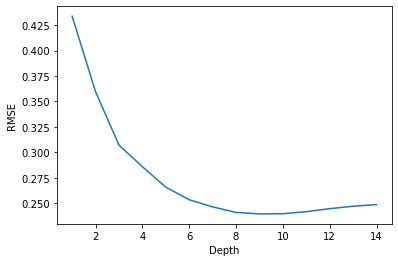

In [824]:
# plot RMSE vs depth
plt.plot(depth, RMSE)
plt.xlabel('Depth')
plt.ylabel('RMSE')
plt.show()

In [825]:
#For R2
depth = np.arange(1,15) #depth in range of 1 to 15
cv_scores = [] #empty list that will hold cv_scores

# performing 10-fold cross validation
for k in depth: #for each depth in depth from 1 to 15
    reg_tree = DecisionTreeRegressor(max_depth=k, min_samples_leaf=5) #regression tree model
    score= cross_val_score(reg_tree, X_train, y_train, cv=10, scoring ="r2" ) #10 fold cross validation
    #used r2 rsquared as a scoring metric 
    cv_scores.append(score.mean()) #appending mean of all scores for specific cross validation in cv_scores

In [826]:
cv_scores

[0.3314220349517676,
 0.5389347941432667,
 0.6637107371224009,
 0.7084258756621956,
 0.7481975471569793,
 0.7709034382685149,
 0.7834927284280997,
 0.7930178093432482,
 0.7957405896986909,
 0.7956213106996393,
 0.7918713963927034,
 0.7867977716316789,
 0.7828155926571789,
 0.7796132970163061]

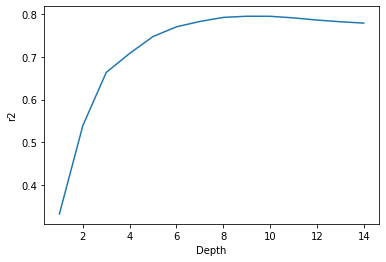

In [827]:
# plot R2 vs depth
plt.plot(depth, cv_scores)
plt.xlabel('Depth')
plt.ylabel('r2')
plt.show()

##### Final Testing

In [871]:
df_Test = pd.read_csv("X_test.csv")
df_Test.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year
0,12.685408,0.250,0.363636,0.513685,0.350303,0.553295,0.0,0.0,0.682606,0.509384,0.513685,0.000000,0.523697,0.015385,0.299934,NaN,0.652137,0.386784,1.0
1,13.180632,0.500,0.272727,0.498914,0.303537,0.323657,0.0,0.0,0.682606,0.509384,0.498914,0.000000,1.000000,0.015385,0.816625,NaN,0.446739,0.312083,1.0
2,12.149502,0.125,0.090909,0.358544,0.413245,0.000000,0.0,0.0,0.861353,0.509384,0.358544,0.000000,0.955251,0.015385,0.197612,NaN,0.355949,0.320352,0.0
3,13.440817,0.375,0.227273,0.585164,0.308254,0.323657,0.0,0.0,0.861353,0.509384,0.437023,0.319066,0.936294,0.015385,0.837627,NaN,0.472587,0.317194,0.0
4,12.388394,0.375,0.090909,0.364189,0.382477,0.000000,0.0,0.0,0.430677,0.509384,0.256476,0.128405,0.806891,0.015385,0.240964,NaN,0.427488,0.391806,1.0


In [851]:
for variable in df_Test.columns:
    df_Test[variable].replace([np.inf, -np.inf], np.nan, inplace=True) #replacing infinity value with nan
    df_Test[variable].dropna(inplace=True)#drpping rows with nan

In [872]:
X_test = df_Test[["bedrooms","sqft_living", "sqft_living15","floors", "view", "grade", "yr_built", "lat", "year"]]
y_test = df_Test.price

In [873]:
X_test.replace([np.inf, -np.inf], np.nan) #replacing infinity value with nan
X_test.dropna()

,bedrooms,sqft_living,sqft_living15,floors,view,grade,yr_built,lat,year
0,0.250,0.513685,0.652137,0.553295,0.0,0.509384,0.523697,0.299934,1.0
1,0.500,0.498914,0.446739,0.323657,0.0,0.509384,1.000000,0.816625,1.0
2,0.125,0.358544,0.355949,0.000000,0.0,0.509384,0.955251,0.197612,0.0
3,0.375,0.585164,0.472587,0.323657,0.0,0.509384,0.936294,0.837627,0.0
4,0.375,0.364189,0.427488,0.000000,0.0,0.509384,0.806891,0.240964,1.0
...,...,...,...,...,...,...,...,...,...
2211,0.375,0.623921,0.659680,0.553295,0.0,0.630930,0.377615,0.991991,0.0
2212,0.375,0.529573,0.583576,0.553295,0.0,0.509384,0.410103,0.550980,0.0
2213,0.250,0.565246,0.621628,0.553295,0.5,0.630930,0.292163,0.338078,0.0
2214,0.375,0.653965,0.716264,0.553295,0.0,0.630930,0.000000,0.568968,1.0


In [876]:
X_test.dropna()

,bedrooms,sqft_living,sqft_living15,floors,view,grade,yr_built,lat,year
0,0.250,0.513685,0.652137,0.553295,0.0,0.509384,0.523697,0.299934,1.0
1,0.500,0.498914,0.446739,0.323657,0.0,0.509384,1.000000,0.816625,1.0
2,0.125,0.358544,0.355949,0.000000,0.0,0.509384,0.955251,0.197612,0.0
3,0.375,0.585164,0.472587,0.323657,0.0,0.509384,0.936294,0.837627,0.0
4,0.375,0.364189,0.427488,0.000000,0.0,0.509384,0.806891,0.240964,1.0
...,...,...,...,...,...,...,...,...,...
2211,0.375,0.623921,0.659680,0.553295,0.0,0.630930,0.377615,0.991991,0.0
2212,0.375,0.529573,0.583576,0.553295,0.0,0.509384,0.410103,0.550980,0.0
2213,0.250,0.565246,0.621628,0.553295,0.5,0.630930,0.292163,0.338078,0.0
2214,0.375,0.653965,0.716264,0.553295,0.0,0.630930,0.000000,0.568968,1.0


In [877]:
len(X_test)

2217

In [878]:
# instantiate learning model (depth = 11)
reg_tree = DecisionTreeRegressor(max_depth=11, min_samples_leaf=5)

# fitting the model
reg_tree.fit(X_train, y_train)

#Prediction
y_pred = reg_tree.predict(X_test)

# RMSE
print("RMSE", np.sqrt(np.mean((y_test - y_pred)**2)))

#R2
print("R2", r2_score(y_test, y_pred))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [5]:
from scipy import stats
stats.t.ppf(0.05, df=24)
stats.t.cdf(-2.19, df=29)

0.018357763275752895